In [ ]:
include("schedule_lib.jl")
using BenchmarkTools
using Base.Threads

In [1]:
filename = "examparams.xlsx"
s = backtracking_search(import_excel_sheet(filename,"172 POL"))

LoadError: UndefVarError: import_excel_sheet not defined

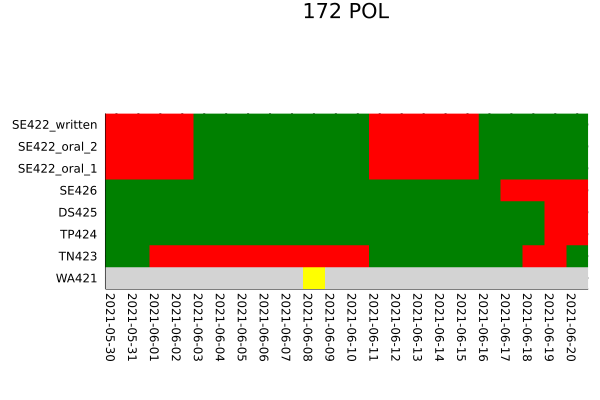

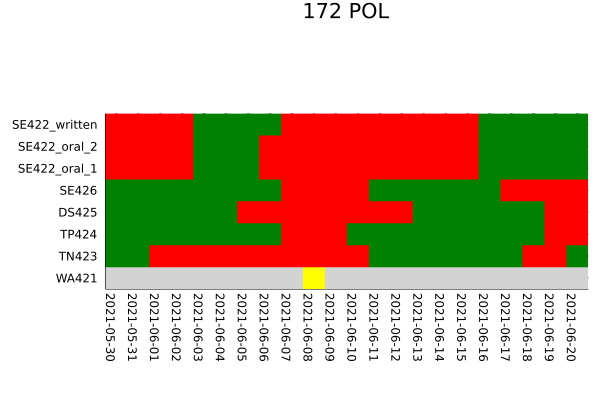

In [20]:
s = import_excel(filename)
s = s[1]
s.courses[1].date = Date(2021,6,8)
print(s)
apply_prep!(s)
print(s)

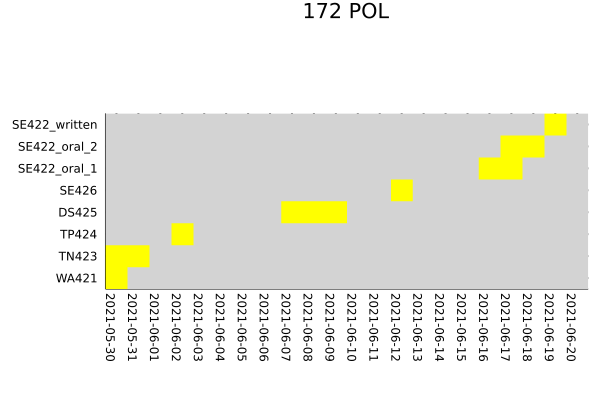

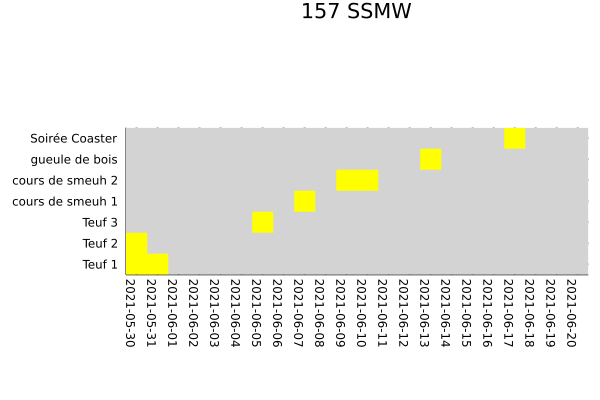

  0.576512 seconds (6.72 M allocations: 598.847 MiB, 13.60% gc time, 40.35% compilation time)
  0.082895 seconds (179.26 k allocations: 10.892 MiB, 7.85% gc time, 99.12% compilation time)


In [21]:
s = import_excel(filename)

# Very slow : 
@time s = backtracking_search.(s,inference=apply_arc_consistency!) 


# Much fatser :
@time s = backtracking_search(s,inference=apply_arc_consistency!) # Exists for both ::schedule and ::Vector{Schedule}

print(s)

In [22]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_prep!)

BenchmarkTools.Trial: 
  memory estimate:  379.73 KiB
  allocs estimate:  3984
  --------------
  minimum time:     126.637 μs (0.00% GC)
  median time:      136.667 μs (0.00% GC)
  mean time:        186.416 μs (15.99% GC)
  maximum time:     8.489 ms (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [23]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_prep!,select_unassigned_variable=$MCV,order_domain_values=$LCV)

BenchmarkTools.Trial: 
  memory estimate:  379.33 KiB
  allocs estimate:  3984
  --------------
  minimum time:     126.802 μs (0.00% GC)
  median time:      134.827 μs (0.00% GC)
  mean time:        167.559 μs (15.65% GC)
  maximum time:     6.528 ms (96.94% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [24]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_arc_consistency!)

BenchmarkTools.Trial: 
  memory estimate:  380.44 KiB
  allocs estimate:  3984
  --------------
  minimum time:     126.379 μs (0.00% GC)
  median time:      135.684 μs (0.00% GC)
  mean time:        169.260 μs (15.47% GC)
  maximum time:     6.509 ms (96.93% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [25]:
s = import_excel(filename)
@benchmark backtracking_search($s,inference=$apply_arc_consistency!,select_unassigned_variable=$MCV,order_domain_values=$LCV)

BenchmarkTools.Trial: 
  memory estimate:  380.05 KiB
  allocs estimate:  3984
  --------------
  minimum time:     126.731 μs (0.00% GC)
  median time:      135.196 μs (0.00% GC)
  mean time:        168.316 μs (15.63% GC)
  maximum time:     6.386 ms (92.70% GC)
  --------------
  samples:          10000
  evals/sample:     1